# Gerekli modül ve paketlerin yüklenmesi

In [44]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [45]:
sns.set()

In [46]:
df = pd.read_csv("iris_dataset.csv")

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [48]:
df_train, df_test = train_test_split(df, test_size=0.25)
#datanın train ve test olacak şekilde yüzde25'e yüzde 75 olacak şekilde bölünmesini amaçlıyoruz

In [49]:
import pickle

with open('df_train.pkl', 'rb') as f:
    df_train = pickle.load(f)

print(df_train.head())


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
40                 5.0               3.5                1.3               0.3   
32                 5.2               4.1                1.5               0.1   
19                 5.1               3.8                1.5               0.3   
89                 5.5               2.5                4.0               1.3   
132                6.4               2.8                5.6               2.2   

     target  target_name  
40        0       setosa  
32        0       setosa  
19        0       setosa  
89        1  versicolor,  
132       2    virginica  


# Modeling Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression

In [52]:
model = LogisticRegression()

Using validation set in order to evaluate our model

In [88]:
#Xt =  "X_train" and Xv stands for "X_validation"
Xt, Xv, yt , yv =train_test_split(X_train, y_train, test_size=0.25)

In [54]:
Xt.shape

(84, 4)

In [55]:
Xv.shape

(28, 4)

In [66]:
model.fit(Xt, yt)

LogisticRegression()

In [67]:
y_pred =model.predict(Xv)
#evaluated on unseen data

In [84]:
np.mean(y_pred == yv)

np.float64(0.25)

In [89]:
model.score(Xv,yv)

0.9285714285714286

 # Using cross-validation to evaluate our model

In [105]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [106]:
model = LogisticRegression()
accurices= cross_val_score(model,X_train,y_train,cv=5, scoring="accuracy")

In [107]:
np.mean(accurices)

np.float64(0.9458498023715416)

# CrossValPredict : Where are we missclassifying points

In [110]:
y_pred = cross_val_predict(model, X_train, y_train, cv=5)

In [115]:
predicted_correctly_mask = y_pred == y_train #boolean maskeleme işlemi ile sadece istenen array alınır
not_predicted_correctly = ~ predicted_correctly_mask 

In [117]:
X_train[not_predicted_correctly]

array([[6.2, 2.8, 4.8, 1.8],
       [6. , 2.7, 5.1, 1.6],
       [6.7, 3. , 5. , 1.7],
       [4.9, 2.5, 4.5, 1.7],
       [6. , 2.2, 5. , 1.5],
       [5.9, 3.2, 4.8, 1.8]])

In [118]:
df_predictions = df_train.copy()

In [119]:
df_predictions["correct_predictions"]= predicted_correctly_mask

In [121]:
df_predictions.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name,correct_predictions
40,5.0,3.5,1.3,0.3,0,setosa,True
32,5.2,4.1,1.5,0.1,0,setosa,True
19,5.1,3.8,1.5,0.3,0,setosa,True
89,5.5,2.5,4.0,1.3,1,"versicolor,",True
132,6.4,2.8,5.6,2.2,2,virginica,True


In [128]:
df_predictions["prediction"] = y_pred

In [129]:
print(df_predictions.columns)


Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'target_name', 'correct_predictions',
       'predictions', 'prediction_label', 'prediction'],
      dtype='object')


In [130]:
df_predictions["prediction_label"] = df_predictions["prediction"].map({0 : "setosa", 1 :"versicolor", 2 : "virginica"})


In [131]:
df_predictions.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name,correct_predictions,predictions,prediction_label,prediction
40,5.0,3.5,1.3,0.3,0,setosa,True,0,setosa,0
32,5.2,4.1,1.5,0.1,0,setosa,True,0,setosa,0
19,5.1,3.8,1.5,0.3,0,setosa,True,0,setosa,0
89,5.5,2.5,4.0,1.3,1,"versicolor,",True,1,versicolor,1
132,6.4,2.8,5.6,2.2,2,virginica,True,2,virginica,2


# Comparing predicted and actual values by using scatter plot

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

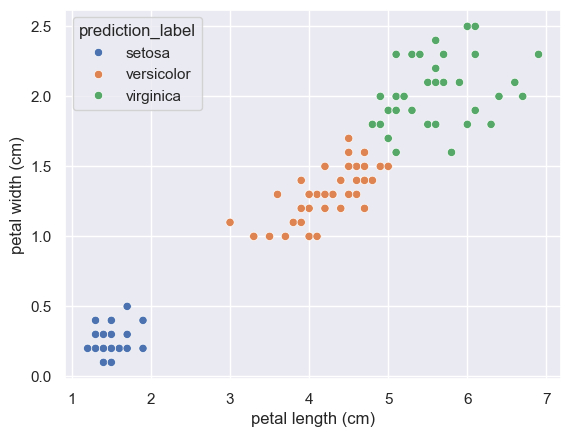

In [136]:
#predicted scatter plot
sns.scatterplot(x="petal length (cm)",y="petal width (cm)",hue="prediction_label",    data = df_predictions)

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

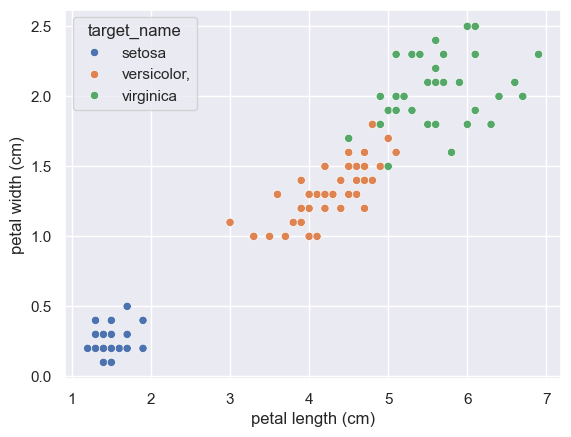

In [ ]:
#actual data points
sns.scatterplot(x="petal length (cm)",y="petal width (cm)",hue="target_name",    data = df_predictions)

In [145]:
def plot_incorrect_predictions(df_predictions, x_axis_feature, y_axis_feature):
    fig, axs = plt.subplots(2,2 ,figsize=(10,10))
    axs = axs.flatten()
    sns.scatterplot(x = x_axis_feature, y = y_axis_feature , hue="prediction_label", data=df_predictions,ax=axs[0])
    sns.scatterplot(x = x_axis_feature, y = y_axis_feature , hue="target_name", data=df_predictions,ax=axs[1])
    sns.scatterplot(x = x_axis_feature, y = y_axis_feature , hue="correct_predictions", data=df_predictions,ax=axs[2])
    axs[3].set_visible(False)
    
    plt.show()


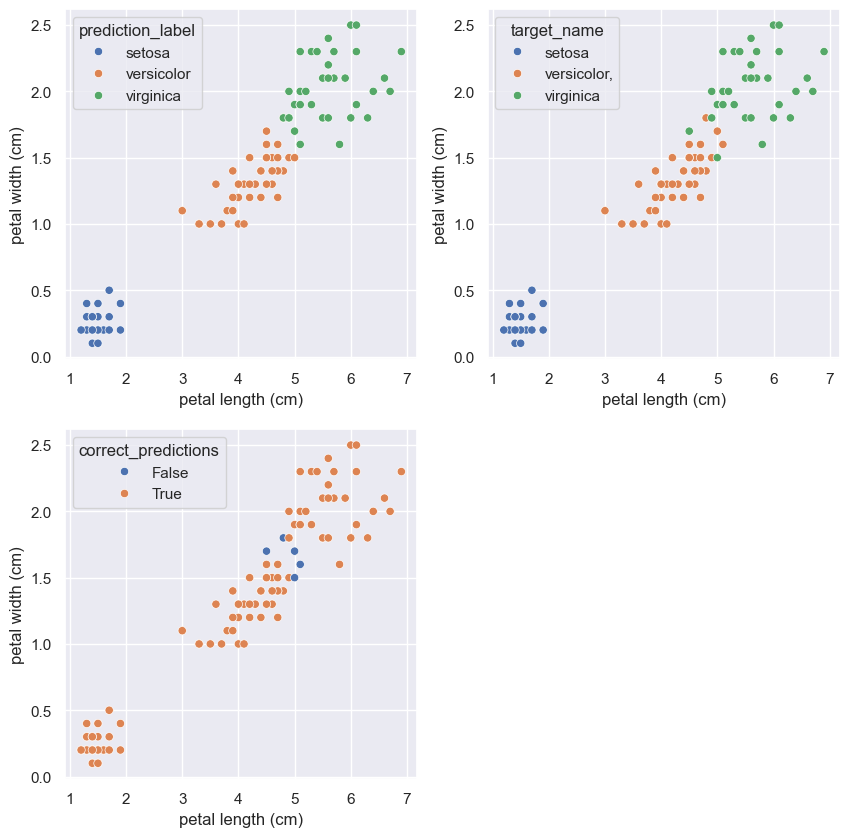

In [146]:
plot_incorrect_predictions(df_predictions, "petal length (cm)","petal width (cm)")